In [1]:
inFile='DHFR_graph_indicator.txt'
node_label= 'DHFR_node_labels.txt'
inAdj= 'DHFR_A.txt'
node_label= 'DHFR_node_labels.txt'
graph_label = 'DHFR_graph_labels.txt'

In [2]:
import networkx as nx
graphs = [] #a list for all graphs

# Add all graphs to the list
for _ in range(756):
    graph = nx.Graph()
    graphs.append(graph)

In [3]:

node_labels_list = []
with open('/'.join([node_label])) as file:
    for line in file:
        label = int(line.strip())  # Convert the label to an integer (assuming labels are integers)
        node_labels_list.append(label)

In [4]:
aa = -1
with open('/'.join([inFile])) as tmp:
    for line_number, line in enumerate(tmp, start=1):
        a = int(line)-1 # 0 based indexing
        if (aa != a or  a == 755):
          nodes = graphs[aa].nodes()
          with  open('/'.join([inAdj])) as tmp_edge :
            for line_edge in tmp_edge.readlines():
              ni,nj = [ int(a) for a in line_edge.split(',')]
              if ni in nodes:
                graphs[aa].add_edge(ni, nj)
          aa = a

          graphs[a].add_node(line_number)


In [5]:
with open('/'.join([graph_label])) as tmp:
    for line_number, line in enumerate(tmp, start=1):
        a = int(line_number)-1 # 0 based indexing
        graphs[a].graph['label'] =  line


In [6]:
degrees = graphs[4].degree()
for node, degree in degrees:
    print(f"The degree of node {node} is {degree}.")

The degree of node 122 is 2.
The degree of node 123 is 3.
The degree of node 124 is 2.
The degree of node 125 is 3.
The degree of node 126 is 3.
The degree of node 127 is 3.
The degree of node 128 is 3.
The degree of node 129 is 3.
The degree of node 130 is 3.
The degree of node 131 is 3.
The degree of node 132 is 3.
The degree of node 133 is 3.
The degree of node 134 is 3.
The degree of node 135 is 3.
The degree of node 136 is 1.
The degree of node 137 is 4.
The degree of node 138 is 2.
The degree of node 139 is 3.
The degree of node 140 is 3.
The degree of node 141 is 3.
The degree of node 142 is 3.
The degree of node 143 is 3.
The degree of node 144 is 3.
The degree of node 145 is 3.
The degree of node 146 is 1.
The degree of node 147 is 1.
The degree of node 148 is 1.
The degree of node 149 is 1.
The degree of node 150 is 1.
The degree of node 151 is 1.
The degree of node 152 is 1.
The degree of node 153 is 1.
The degree of node 154 is 1.
The degree of node 155 is 1.
The degree of 

In [7]:
ind = 0
for graph in graphs:
  for node in graph.nodes():
      graph.nodes[node]['label'] = node_labels_list[ind]
      ind += 1

In [8]:
node_labels_list = []
with open('/'.join([node_label])) as file:
    for line in file:
        label = int(line.strip())  # Convert the label to an integer (assuming labels are integers)
        node_labels_list.append(label)

NameError: name 'plt' is not defined

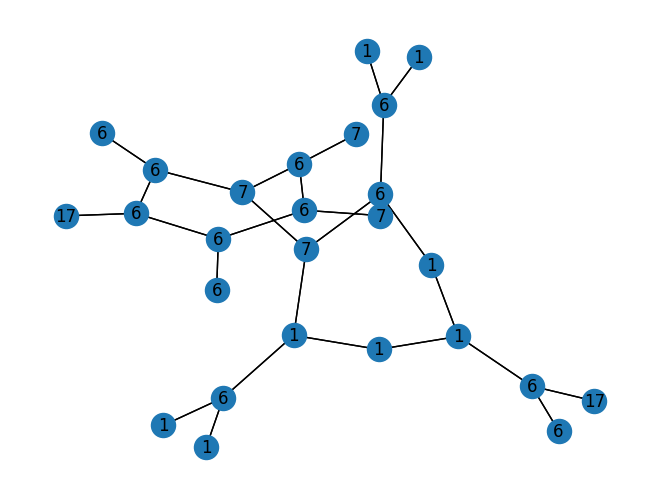

In [9]:
import networkx as nx






# Draw the graph with node labels and edges
pos = nx.spring_layout(graphs[1])
nx.draw(graphs[1], pos, labels={n: graphs[1].nodes[n]['label'] for n in graphs[1].nodes()})
nx.draw_networkx_edges(graphs[1], pos)

# Show the plot
plt.show()


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


graph_new = nx.Graph()
for i in range(len(graphs)):
    graph_new = nx.compose(graph_new, graphs[i])

num_walks = 10
walk_length = 30

In [11]:
from node2vec import Node2Vec
# from torch_geometric.nn import Node2Vec
import networkx as nx


# node2vec = Node2Vec(graph_new, embedding_dim=64, walk_length=30, context_size=10)
node2vec = Node2Vec(graph_new, dimensions=64, walk_length=walk_length, num_walks=num_walks)
model = node2vec.fit(window=5, min_count=1, batch_words=4)

# Store the node embeddings (feature vectors) learned by the algorithm
embeddings = []
# Store the class labels of nodes
labels = []

for node in graph_new.nodes():
    label = graph_new.nodes[node].get('label')

    # Check if the node is in the vocabulary
    if str(node) in model.wv:
        labels.append(label)
        embeddings.append(model.wv[str(node)])
        # embeddings.append(model[str(node)])
    else:
        print(f"Node {node} not in vocabulary, skipping.")

label_mapping = {label: idx for idx, label in enumerate(set(labels))}
numeric_labels = np.array([label_mapping[label] for label in labels])



Computing transition probabilities:   0%|          | 0/28653 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [01:04<00:00,  6.45s/it]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)


X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

/tmp/ipykernel_4332/149301924.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  X_train = torch.FloatTensor(X_train)


In [14]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out


In [28]:
# Train the logistic regression model
input_size = model.vector_size  # Assuming model is the Word2Vec model


output_size = 9  # Binary classification
lr_model = LogisticRegressionModel(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lr_model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4, nesterov=True)

In [26]:
num_epochs = 100
for epoch in range(num_epochs):
    outputs = lr_model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the logistic regression model
with torch.no_grad():
    outputs = lr_model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = torch.sum(predicted == y_test).item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
colors = ['red' if label == 1 else 'blue' for label in labels_array]
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, alpha=0.7)

# Annotate the points with node labels
for i, label in enumerate(map(str, nodes)):
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

IndexError: Target 17 is out of bounds.

In [42]:
# Create label_mapping without adding +1 offset
label_mapping = {label: idx for idx, label in enumerate(set(labels))}

# Convert tensor labels to Python integers before using them as keys
y_train = torch.LongTensor([label_mapping.get(int(label), -1) for label in y_train])
y_test = torch.LongTensor([label_mapping.get(int(label), -1) for label in y_test])


In [22]:
import networkx as nx

# Assuming 'label' is the node attribute representing the class
# Replace it with the actual attribute name in your dataset
node_labels = nx.get_node_attributes(graph_new, 'label')

# Get unique classes
unique_classes = set(node_labels.values())

# Print the number of unique classes
num_unique_classes = len(unique_classes)
print(f"Number of unique classes: {num_unique_classes}")

# Optionally, print the unique classes themselves
print("Unique classes:", unique_classes)


Number of unique classes: 9
Unique classes: {1, 35, 6, 7, 8, 9, 16, 17, 53}


In [54]:
graph_taze = nx.Graph()
for i, subgraph in enumerate(graphs):
    graph_taze.add_node(i, label=subgraph.graph.get('label', 0)) 

In [57]:
for i in range(len(graphs)):
    for j in range(i + 1, len(graphs)):
        size_similarity = abs(len(graphs[i]) - len(graphs[j]))
        graph_taze.add_edge(i, j, weight=size_similarity)

In [58]:
node2vec = Node2Vec(graph_taze, dimensions=64, walk_length=30, num_walks=10)
model = node2vec.fit(window=5, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/756 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:31<00:00,  3.18s/it]


In [59]:
# Store the node embeddings (feature vectors) learned by the algorithm
embeddings = []
# Store the class labels of subgraphs
labels = []

for node in graph_taze.nodes():
    label = graph_taze.nodes[node].get('label', 0)  # Default to label 0 if not assigned

    
    if str(node) in model.wv:
        labels.append(label)
        embeddings.append(model.wv[str(node)])
    else:
        print(f"Node {node} not in vocabulary, skipping.")

In [60]:
label_mapping = {label: idx for idx, label in enumerate(set(labels))}
numeric_labels = [label_mapping[label] for label in labels]

In [62]:
from sklearn.metrics import accuracy_score

if len(set(labels)) < 2:
    print("Not enough samples for train-test split. Add more labeled subgraphs.")
else:
    # Split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(embeddings, numeric_labels, test_size=0.2, random_state=42)

    # Train Logistic Regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Make predictions
    predictions = classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.6052631578947368


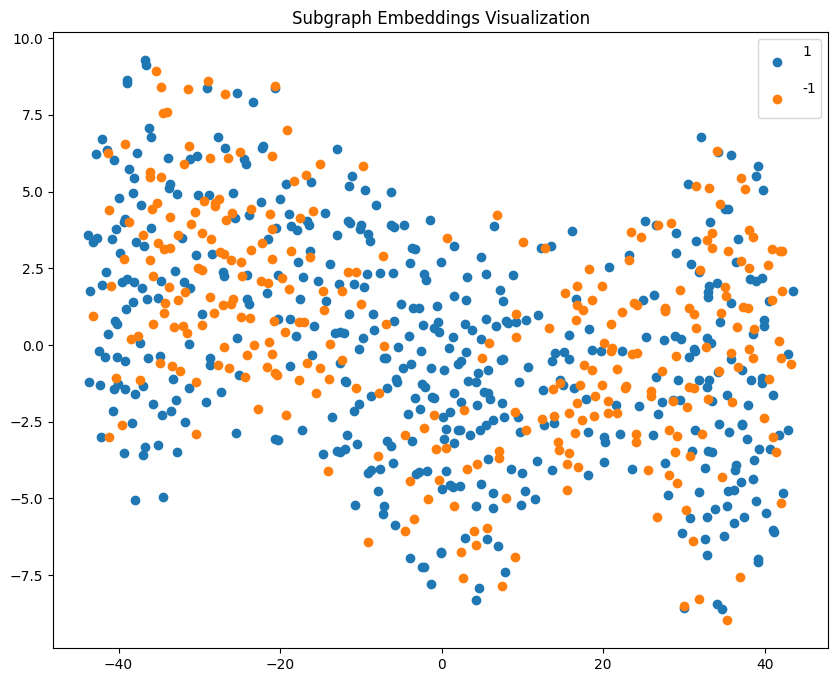

In [63]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have already obtained embeddings and labels
embeddings = model.wv.vectors
labels = [graph_taze.nodes[node].get('label') for node in graph_taze.nodes() if str(node) in model.wv]

# Project embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Create a scatter plot for visualization
plt.figure(figsize=(10, 8))
for i, label in enumerate(set(labels)):
    indices = [j for j, l in enumerate(labels) if l == label]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=label)

plt.legend()
plt.title("Subgraph Embeddings Visualization")
plt.show()


In [ ]:
aaa = nx.Graph()
for i, subgraph in enumerate(graphs):
    label = subgraph.graph.get('label')
    if label is not None:
        graph_new.add_node(i, label=label)

In [66]:
# Assuming you have already obtained embeddings and labels
embeddings = model.wv.vectors
labels = [graph_new.nodes[node].get('label') for node in graph_new.nodes() if str(node) in model.wv]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Convert features and labels to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).squeeze()  # Ensure labels are 1-dimensional
y_test = torch.LongTensor(y_test).squeeze()    # Ensure labels are 1-dimensional


# Define a simple logistic regression model using PyTorch
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

# Train the logistic regression model
input_size = len(embeddings[0])
output_size = 2  # Binary classification
lr_model = LogisticRegressionModel(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lr_model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4, nesterov=True)

num_epochs = 100
for epoch in range(num_epochs):
    outputs = lr_model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the logistic regression model
with torch.no_grad():
    outputs = lr_model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = torch.sum(predicted == y_test).item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
colors = ['red' if label == 1 else 'blue' for label in labels]
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, alpha=0.7)

# Annotate the points with node labels
for i, label in enumerate(map(str, graph_taze.nodes())):
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("Subgraph Embeddings Visualization with Logistic Regression")
plt.show()

TypeError: an integer is required (got type NoneType)

FINAL TRY

In [10]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'graphs' is a list of subgraphs
graph_taze = nx.Graph()
for i, subgraph in enumerate(graphs):
    graph_taze.add_node(i, label=subgraph.graph.get('label', 0))

# Create edges between subgraphs based on the sum of degree centrality as similarity
for i in range(len(graphs)):
    for j in range(i + 1, len(graphs)):
        # Calculate degree centrality for nodes in subgraphs
        centrality_i = sum(nx.degree_centrality(graphs[i]).values())
        centrality_j = sum(nx.degree_centrality(graphs[j]).values())
        
        # Use the sum of degree centrality as the similarity measure
        similarity = centrality_i + centrality_j

        if similarity != 0:
            # print(similarity)
            graph_taze.add_edge(i, j, weight=similarity)
            # If the similarity is 0, don't add an edge.

node2vec = Node2Vec(graph_taze, dimensions=16, walk_length=10, num_walks=1)
model = node2vec.fit(window=5, min_count=1, batch_words=4)


Computing transition probabilities:   0%|          | 0/756 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


In [ ]:
print("abas")